In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1a. Analysis of Numeric Variables

In [3]:
df = pd.read_csv(r"D:\Work\Y2 work\SC1015\Lab\Lab3\train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
usefulData= pd.DataFrame(df[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']])
usefulData


,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836
...,...,...,...,...
1455,7917,1647,953,460
1456,13175,2073,1542,500
1457,9042,2340,1152,252
1458,9717,1078,1078,240


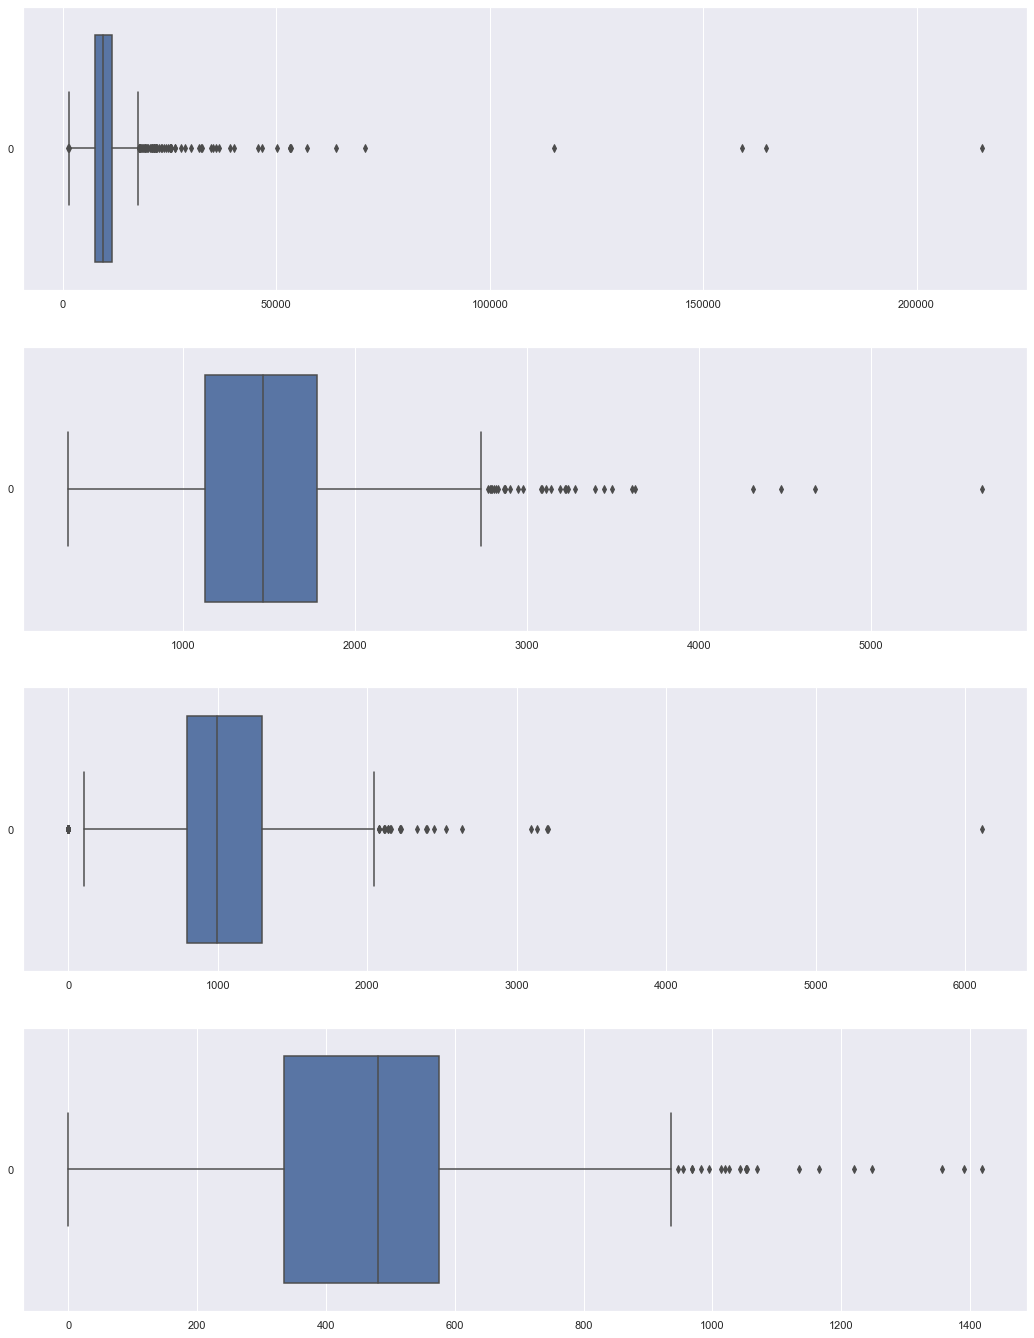

In [23]:
f, axes = plt.subplots(4, 1, figsize=(18, 24))
arrayOfGraphs=[]
count = 0
for var in usefulData:
    arrayOfGraphs.append(sb.boxplot(data = usefulData[var], orient = "h", ax = axes[count]))
#     sb.histplot(data = usefulData[var], ax = axes[count,1])
#     sb.violinplot(data = usefulData[var], orient = "h", ax = axes[count,2])
    count += 1

In [58]:
firstquantile = usefulData.quantile(0.25)
thirdquantile = usefulData.quantile(0.75)
IQR=thirdquantile-firstquantile
lowerRange = firstquantile-1.5*IQR
upperRange = thirdquantile+1.5*IQR

In [63]:
for col in usefulData:
    outliers = len(usefulData[usefulData[col]<lowerRange.loc[col]] + usefulData[usefulData[col]>upperRange.loc[col]]) 
    print(f"{col} has {outliers} number of outliers")

LotArea has 69 number of outliers
GrLivArea has 31 number of outliers
TotalBsmtSF has 61 number of outliers
GarageArea has 21 number of outliers


### LotArea has the most number of outliers at 69 compared to the other variables

## Problem 1b. Most skewed

In [80]:
skew=usefulData.skew()
skew

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

In [79]:
skew.idxmax()

'LotArea'

In [84]:
usefulData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


In [93]:
print(f"Skew is positive as {skew.max()} is positive and Mean > Median is {usefulData['LotArea'].mean() > usefulData['LotArea'].median()}")

Skew is positive as 12.207687851233496 is positive and Mean > Median is True


## The skew for LotArea is the maximum at 12.2 and the positive sign indicates that this is a positve skew. This is further supported as the Mean for LotArea 10516  is greater than its median which is 9478.


## Problem 1c. Top 2 variables

In [88]:
corrtable= pd.DataFrame(df[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea','SalePrice']])
salecorr=corrtable.corr()["SalePrice"]
salecorr

LotArea        0.263843
GrLivArea      0.708624
TotalBsmtSF    0.613581
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [89]:
salecorr.idxmax()

'SalePrice'

In [90]:
salecorr.drop("SalePrice").idxmax()

'GrLivArea'

In [92]:
salecorr.drop(["SalePrice","GrLivArea"]).idxmax()

'GarageArea'

## The top variable with highest corelation to SalePrice is GrLivArea at 0.708624 followed by GarageArea at 0.623431

## Problem 2a. Highest number of levels

In [119]:
df2 = pd.DataFrame(df[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
df2

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


In [126]:
for col in df2:
    print(f"{col} has {len(df2[col].value_counts())} levels")


MSSubClass has 15 levels
Neighborhood has 25 levels
BldgType has 5 levels
OverallQual has 10 levels


In [133]:
current_max = 0
max_level = np.nan
for col in df2:
    cur = df2[col].value_counts()
    if cur.max() > current_max:
        max_level = cur.idxmax()
        current_max = cur.max()
print(max_level)
print(current_max)

1Fam
1220


## Neighbourhood has the highest number of levels at 25 and 1Fam level has the highest number of houses at 1220


## Problem 2b. Choose top 2 variables that help predict SalePrice

In [9]:
df3 = pd.DataFrame(df[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual','SalePrice']])
df3

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000
...,...,...,...,...,...
1455,60,Gilbert,1Fam,6,175000
1456,20,NWAmes,1Fam,6,210000
1457,70,Crawfor,1Fam,7,266500
1458,20,NAmes,1Fam,5,142125


In [70]:
order=df3.groupby(["Neighborhood"]).median().sort_values(by=["SalePrice"])
order.index

Index(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge', 'NridgHt'],
      dtype='object', name='Neighborhood')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

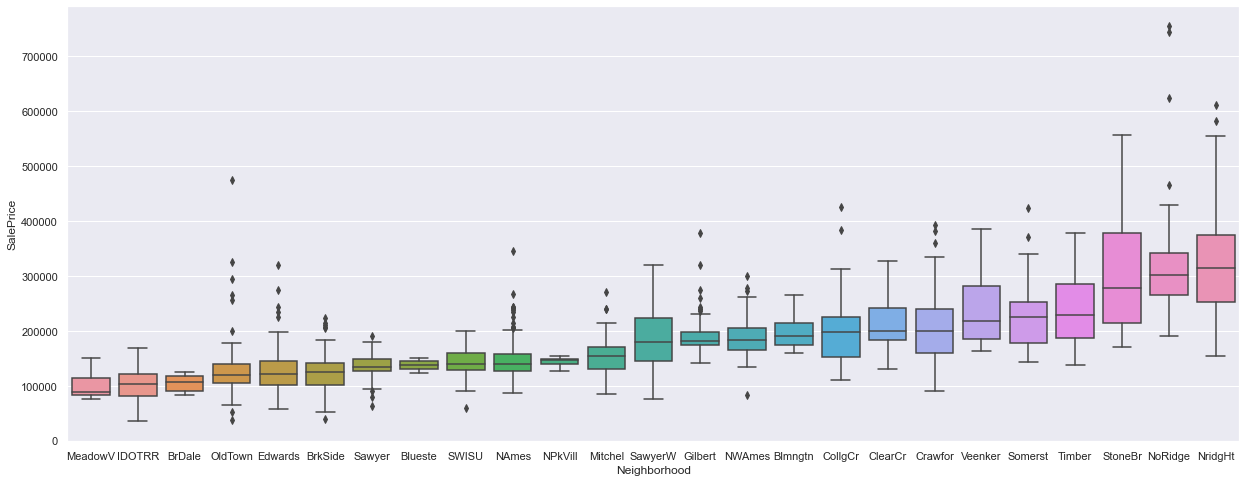

In [68]:
sb.set(rc={'figure.figsize':(21,8)})
sb.boxplot(data=dftemp,x="Neighborhood",y="SalePrice",order=df4.index)

In [79]:
order=df3.groupby(["MSSubClass"]).median().sort_values(by=["SalePrice"])
order.index

Int64Index([180, 30, 45, 190, 50, 90, 85, 40, 160, 70, 20, 75, 80, 120, 60], dtype='int64', name='MSSubClass')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

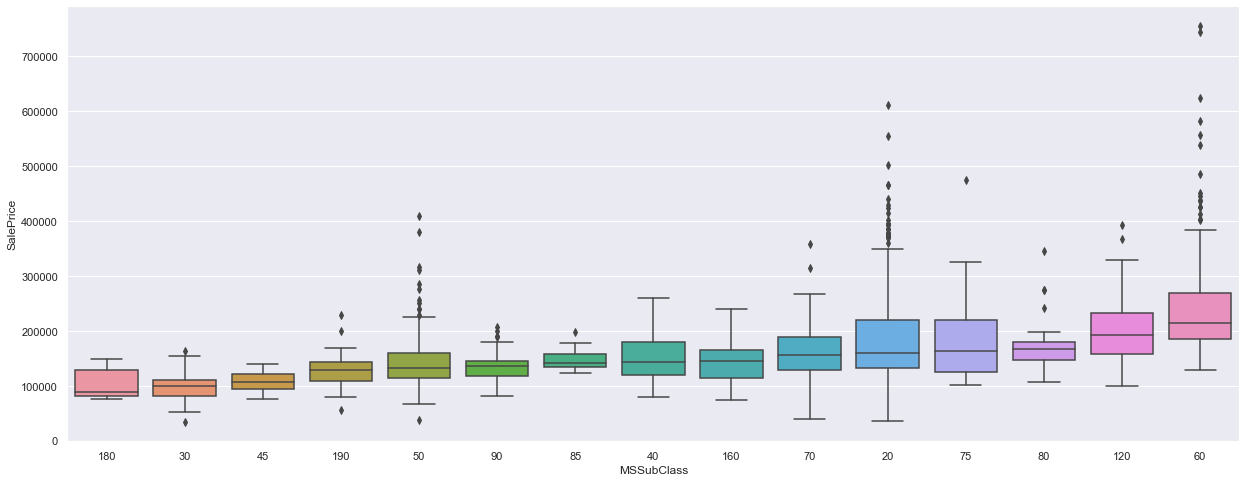

In [80]:
sb.boxplot(data=df3,x="MSSubClass",y="SalePrice",order=order.index)

In [83]:
order=df3.groupby(["BldgType"]).median().sort_values(by=["SalePrice"])
order.index

Index(['2fmCon', 'Duplex', 'Twnhs', '1Fam', 'TwnhsE'], dtype='object', name='BldgType')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

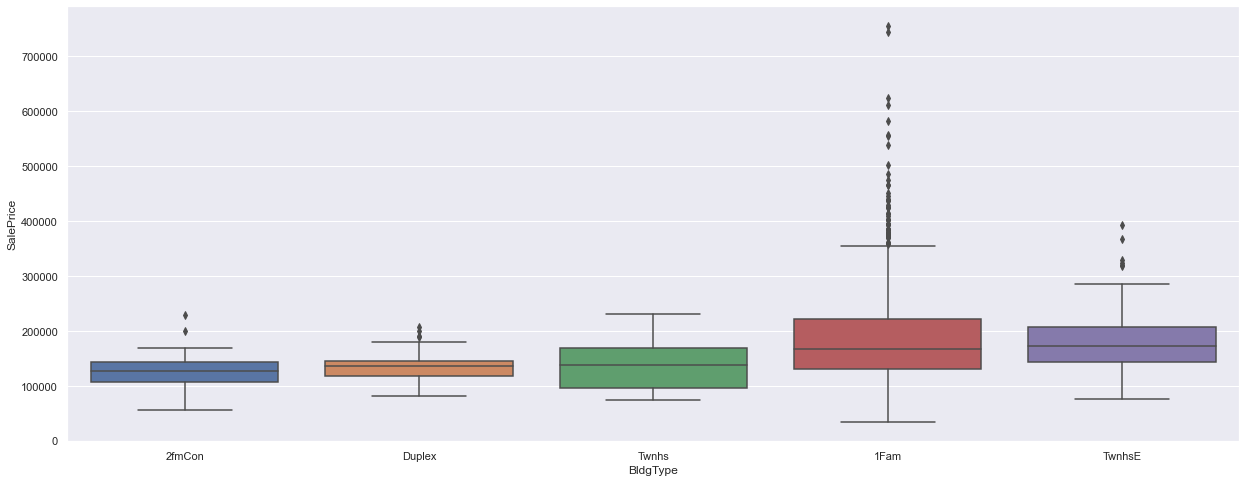

In [84]:
sb.boxplot(data=df3,x="BldgType",y="SalePrice",order=order.index)

In [85]:
order=df3.groupby(["OverallQual"]).median().sort_values(by=["SalePrice"])
order.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='OverallQual')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

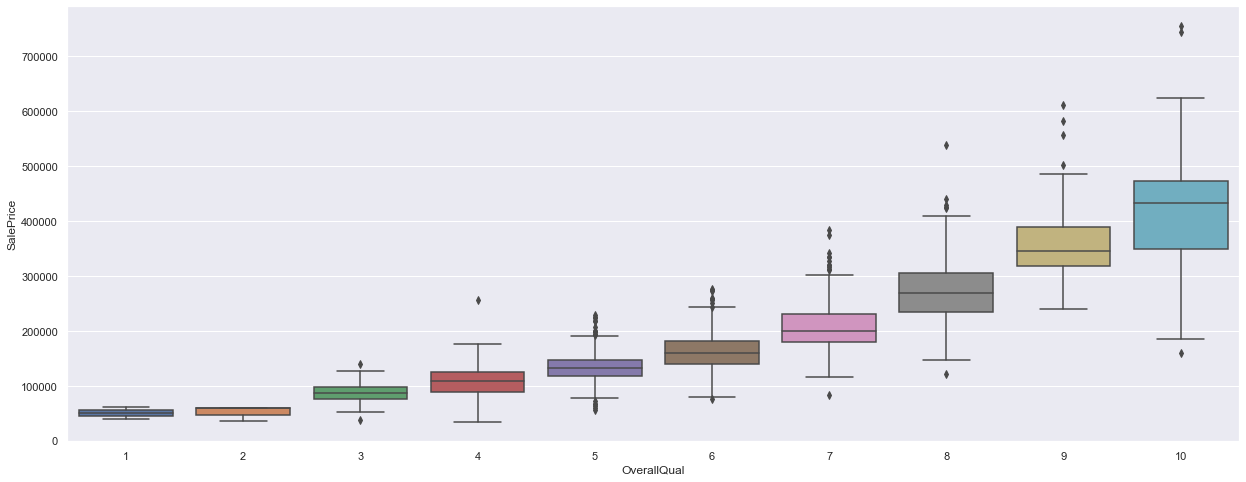

In [86]:
sb.boxplot(data=df3,x="OverallQual",y="SalePrice")

## The top 2 variables affecting SalesPrice are OverallQual and neighbourhood. Each catergory in these two variables will shift the IQR the greatest meaning that the correlation for OverallQual and neighbourhood is the highest. Additonally, the IQRs for the two variables span the widest range and thus can create the most accurate correlation relationship

## Problem 3. SalePrice affected by Garage


In [94]:
df4 = pd.DataFrame(df[["GarageType","SalePrice"]])

In [95]:
df4["HasGarage"] = df4["GarageType"].notna()

In [96]:
df4

,GarageType,SalePrice,HasGarage
0,Attchd,208500,True
1,Attchd,181500,True
2,Attchd,223500,True
3,Detchd,140000,True
4,Attchd,250000,True
...,...,...,...
1455,Attchd,175000,True
1456,Attchd,210000,True
1457,Attchd,266500,True
1458,Attchd,142125,True


<AxesSubplot:xlabel='HasGarage', ylabel='SalePrice'>

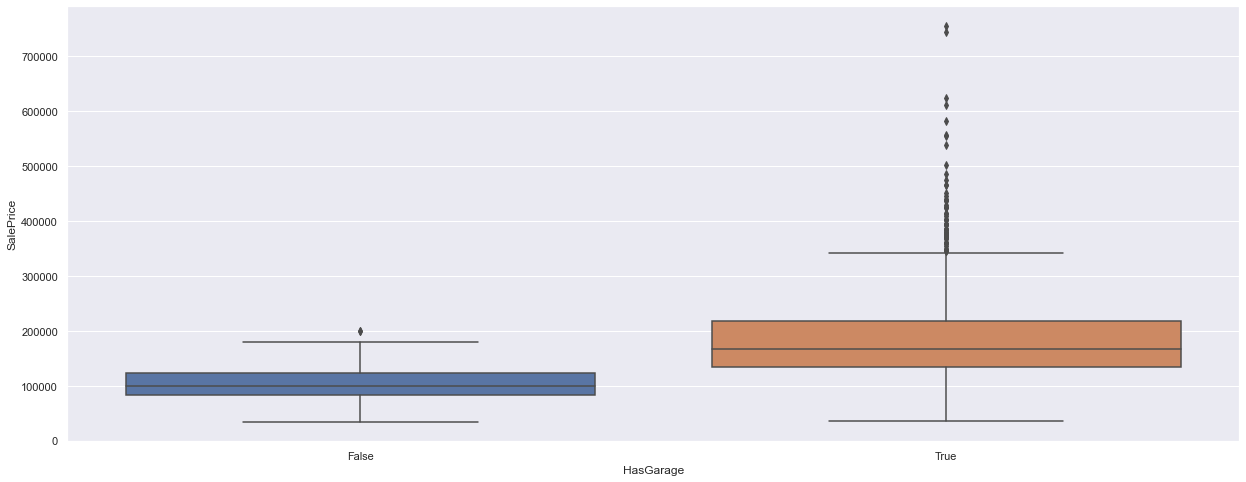

In [98]:
sb.boxplot(data=df4,x="HasGarage",y="SalePrice")

## The SalePrice of a house is dependant on whether that house has a garage. The boxplot shows that houses with garages typically have higher selling prices. The IQR of houses with garages as shown by the true column in the boxplot is higher compared to the IQR of houses without garages as shown by the false column in the boxplot.